<a href="https://colab.research.google.com/github/luciedum-dot/Intro-to-data-analysis-with-Python---Final-Project/blob/main/Notebook%202%20%3A%20Parts%202%20and%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Part 2 : Analysing different variables - sex, age and nationality**
In this notebook, we will look at the profile of the MEC and analyse the impact on several variables depending on the type of offense

#1.Preparatory work
This section repeats work used for the Notebook 1

In [81]:
!pip install pandas numpy matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [82]:
!git clone https://github.com/luciedum-dot/Intro-to-data-analysis-with-Python---Final-Project.git



fatal: destination path 'Intro-to-data-analysis-with-Python---Final-Project' already exists and is not an empty directory.


##1.1 Read and pivot Excel File - MEC

In [83]:
#Read Excel File - total accused people and display the sheets' names

path = "Intro-to-data-analysis-with-Python---Final-Project/Data/mec.xlsx"

xls = pd.ExcelFile(path)
xls.sheet_names


['Lisez moi',
 '1.sexe - age',
 '2.nationalité',
 '3.sexe',
 '4.nationalité majmin',
 '5.PM - PP']

In [84]:
#Show the Excel File on the sheet sex, in order to look at the "total" line for every year and see the trend

#Read Excel on the sheet 3.sexe, skipping the first 2 rows and setting multiple headers (years and categories)
df = pd.read_excel(path, sheet_name="3.sexe", skiprows=2, header=[0, 1])

#Remove the 1st empty column of the sheet
df = df.iloc[:,1:]

#Pivot the year header
pivoted_df = (
    df
    .set_index("Sexe")
    .stack(level=1, future_stack=True)          # move second header to rows & future_stack=True just allow us to avoid a warning
    .reset_index()           # make it a column
    .rename(columns={"level_1": "Année"})
  )

#Cast the type of Sexe column from tupple to string
pivoted_df["Sexe"] = pivoted_df["Sexe"].str[0]

pivoted_df.head(30)

,Sexe,Année,Homicides (y compris coups et blessures volontaires suivis de mort),Tentatives d'homicide,Violences physiques dans le cadre intra-familial,Violences physiques hors cadre intra-familial,Violences sexuelles,Viols et tentatives de viols,Vols avec arme,Vols violents sans arme,Vols sans violence contre des personnes,Cambriolages de logement,Vols de véhicule,Vols dans les véhicule,Vols d'accessoires sur les véhicules,Destructions et dégradations volontaires,Escroqueries et fraudes aux moyens de paiements,Trafic de stupéfiants,Usage de stupéfiants
0,Femme,2016,135,195,15202,21601,1735,179,257,1574,16709,2953,991,1018,297,7981,20123,3489,16569
1,Femme,2017,174,196,16166,22340,1744,157,285,1398,16490,2898,959,1437,361,8435,19650,3693,17431
2,Femme,2018,188,197,16964,23212,2226,212,235,1389,16756,3021,1087,1303,258,8537,19190,3996,17267
3,Femme,2019,159,209,19064,22809,2166,264,239,1224,16352,3458,875,934,325,9433,17646,4275,16410
4,Femme,2020,148,254,22112,20139,2367,329,240,1137,13291,2548,892,964,404,8740,15767,3680,14221
5,Femme,2021,163,258,27604,21514,2731,419,216,982,14264,2396,983,1181,206,8378,16538,4015,17730
6,Femme,2022,173,294,32347,21104,2846,524,213,970,12799,2549,975,1040,316,7955,13251,4293,19178
7,Femme,2023,217,347,38058,22519,3154,644,253,1095,13423,2853,1285,841,310,8467,13499,4397,21969
8,Femme,2024,192,345,41543,22977,3642,739,273,905,12694,2729,1257,957,272,8665,12668,5090,21888
9,Homme,2016,851,1676,81190,105280,36515,10502,5474,17477,56807,39796,25072,24294,7220,70230,43860,37230,165861


##1.2 Display the df-mec just for Sex=Total

In [85]:
#Visualize just the total column
#An other way to do it, but less reliable :df_total = pivoted_df.loc[18:26] #df_total.head(10)
df_total = pivoted_df[pivoted_df["Sexe"] == "Total"]
display(df_total)


,Sexe,Année,Homicides (y compris coups et blessures volontaires suivis de mort),Tentatives d'homicide,Violences physiques dans le cadre intra-familial,Violences physiques hors cadre intra-familial,Violences sexuelles,Viols et tentatives de viols,Vols avec arme,Vols violents sans arme,Vols sans violence contre des personnes,Cambriolages de logement,Vols de véhicule,Vols dans les véhicule,Vols d'accessoires sur les véhicules,Destructions et dégradations volontaires,Escroqueries et fraudes aux moyens de paiements,Trafic de stupéfiants,Usage de stupéfiants
18,Total,2016,986,1871,96392,126881,38250,10681,5731,19051,73516,42749,26063,25312,7517,78211,63983,40719,182430
19,Total,2017,1124,2162,99234,130463,41195,11769,5974,17444,75509,42997,23620,27252,9586,84000,64398,43976,188802
20,Total,2018,1202,2318,106902,140508,47480,13718,5615,17762,77679,44320,25569,28307,8641,86237,61006,45476,186901
21,Total,2019,1124,2393,120950,136623,51090,15288,5426,17650,76580,40525,22617,25480,8187,86942,60623,47059,177423
22,Total,2020,1076,2609,138026,126220,52505,16816,5048,16257,65298,35134,20525,23750,6868,78796,52646,41197,160827
23,Total,2021,1175,2802,164256,133195,65480,22530,4937,16132,66110,32280,20687,22775,6019,75352,55864,46712,221372
24,Total,2022,1358,3099,180057,131188,70298,25278,5003,14505,64785,31140,19583,23412,7831,71869,50931,49012,251629
25,Total,2023,1427,3462,195000,137540,76549,28242,5080,13810,65652,32977,23412,21362,7703,75694,50222,48790,262871
26,Total,2024,1448,3390,197954,136407,80916,29035,5070,12809,63258,32087,23925,24093,7565,71054,47480,52325,290632


##1.3 Read Population Excel

In [86]:
#Analyze the evolution of criminality with taking into account population growth:
path = "Intro-to-data-analysis-with-Python---Final-Project/Data/pop.xlsx"

xls_pop = pd.ExcelFile(path)
xls_pop.sheet_names



['France - Figure 1',
 'France - Figure 2',
 'France - Figure 3',
 'France - Figure 4',
 'France - Figure 5',
 'France - Figure 6',
 'UE - Figure 1',
 'UE - Figure 2',
 'UE - Figure 3']

In [87]:
#Show the Excel File on the sheet France - Figure 2, in order to look at the "Ensemble" column for every year between 2016 to 2024
df_pop = pd.read_excel(path, sheet_name="France - Figure 2", skiprows=3)
df_pop = df_pop[0:-4] #Remove the last 4 rows which contained strings
df_pop.head(10)


,Année,Femmes,Hommes,Ensemble
0,2025,35326.405,33279.211,68605.616
1,2024,35254.976,33181.640,68436.616
2,2023,35172.311,33073.771,68246.082
3,2022,35092.520,32967.687,68060.207
4,2021,34930.005,32767.086,67697.091
5,2020,34812.046,32629.804,67441.850
6,2019,34722.069,32535.913,67257.982
7,2018,34594.401,32397.758,66992.159
8,2017,34477.222,32297.260,66774.482
9,2016,34372.558,32230.087,66602.645


In [88]:
df_pop_années = df_pop.loc[1:9]
display(df_pop_années)

,Année,Femmes,Hommes,Ensemble
1,2024,35254.976,33181.640,68436.616
2,2023,35172.311,33073.771,68246.082
3,2022,35092.520,32967.687,68060.207
4,2021,34930.005,32767.086,67697.091
5,2020,34812.046,32629.804,67441.850
6,2019,34722.069,32535.913,67257.982
7,2018,34594.401,32397.758,66992.159
8,2017,34477.222,32297.260,66774.482
9,2016,34372.558,32230.087,66602.645


#2.What variables are most closely linked to committing a crime?


## 2.1 Sex

In [89]:
#Reshaping the population data in long format (vs. wide format, where each category is in a separate column),
#so that each variable is in a single column, and there’s a column that indicates the category:
df_pop_années_long = df_pop_années.melt(
    id_vars='Année',
    value_vars=['Femmes', 'Hommes', 'Ensemble'],
    var_name='Sexe',
    value_name='Population'
)
df_pop_années_long.head()

,Année,Sexe,Population
0,2024,Femmes,35254.976
1,2023,Femmes,35172.311
2,2022,Femmes,35092.520
3,2021,Femmes,34930.005
4,2020,Femmes,34812.046


In [90]:
#Mapping the different sex so that the slight variations in the different df do not affect the implementation of the code

sex_mapping = {
    'Femmes': 'female',
    'Femme': 'female',
    'Hommes': 'male',
    'Homme': 'male',
    'Ensemble': 'total',
    'Total': 'total'
    }


In [91]:
#Safety step: inspection code to check which values exist in the Sexe column in two different DataFrames (including NaN):

print(df_pop_années_long['Sexe'].value_counts(dropna=False))
print(pivoted_df['Sexe'].value_counts(dropna=False))

Sexe
Femmes      9
Hommes      9
Ensemble    9
Name: count, dtype: int64
Sexe
Femme    9
Homme    9
Total    9
Name: count, dtype: int64


In [92]:
#Copy created to not have to go on the top of the page to run the pivoted_df cell
pivoted_df_copy = pivoted_df.copy()


In [93]:
#Standardization of the values in the Sexe column using the precedently created mapping dictionary:

df_pop_années_long['Sexe'] = df_pop_années_long['Sexe'].map(sex_mapping)

pivoted_df_copy['Sexe'] = pivoted_df_copy['Sexe'].map(sex_mapping)

###Sexual violences rate per 100k by sex

In [94]:
#Computation of the totals (whole period) by sex (Sexe) from the two different DataFrames, on the variable violences sexuelles and on the variable population

sv_totals = (
    pivoted_df_copy
    .groupby('Sexe')['Violences sexuelles']
    .sum()
    .reset_index()
)

pop_totals = (
    df_pop_années_long
    .groupby('Sexe')['Population']
    .sum()
    .reset_index()
)

In [95]:
#Compute the rate by sex for 100 000 individuals:

df_sv_rates_by_sex = pd.merge(sv_totals, pop_totals, on='Sexe')

df_sv_rates_by_sex['Rate per 100k'] = (
    df_sv_rates_by_sex['Violences sexuelles'] / (df_sv_rates_by_sex['Population']*1000) * 100_000
)
df_sv_rates_by_sex_renamed = df_sv_rates_by_sex.rename(columns={
    "Violences sexuelles": "Sexual violences",
    "Sexe": "Sex"
    })
df_sv_rates_by_sex_renamed

,Sex,Sexual violences,Population,Rate per 100k
0,female,22611,313428.108,7.214095
1,male,501152,294081.006,170.412910
2,total,523763,607509.114,86.214838


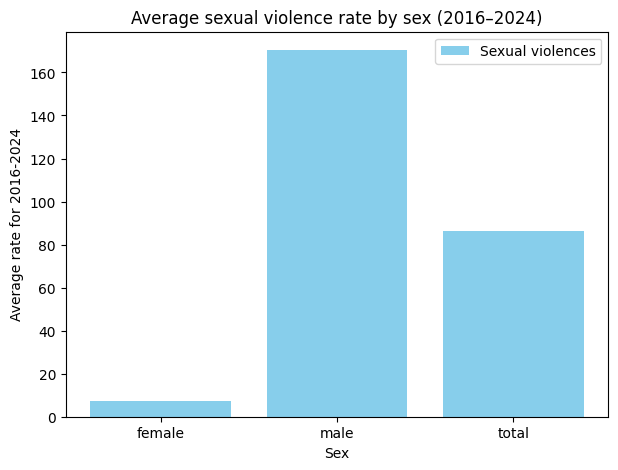

In [96]:
#Plot barplots for different crime on the sex variable to see the criminality rate by sex,
# and then analyze for exemple which crimes women are the most likely to commit

plt.figure(figsize=(7,5))
plt.bar(df_sv_rates_by_sex_renamed["Sex"], df_sv_rates_by_sex_renamed["Rate per 100k"], color='skyblue', label='Sexual violences')
plt.title("Average sexual violence rate by sex (2016–2024)")
plt.xlabel("Sex")
plt.ylabel("Average rate for 2016-2024")
plt.legend()
plt.show()





###Homicides rate by sex

In [97]:
#Computation of the totals by sex (Sexe) from the two different DataFrames, on the variable Homicides and on the variable population

hom_totals = (
    pivoted_df_copy
    .groupby('Sexe')['Homicides (y compris coups et blessures volontaires suivis de mort)']
    .sum()
    .reset_index()
)

pop_totals = (
    df_pop_années_long
    .groupby('Sexe')['Population']
    .sum()
    .reset_index()
)

In [98]:
#Compute the rate by 100 000 individuals:

df_hom_rates_by_sex = pd.merge(hom_totals, pop_totals, on='Sexe')

df_hom_rates_by_sex['Rate per 100k'] = (
    df_hom_rates_by_sex['Homicides (y compris coups et blessures volontaires suivis de mort)'] / (df_hom_rates_by_sex['Population']*1000) * 100_000
)
df_hom_rates_by_sex_renamed = df_hom_rates_by_sex.rename(columns={
    "Homicides (y compris coups et blessures volontaires suivis de mort)": "Homicides",
    "Sexe": "Sex"
    })
df_hom_rates_by_sex_renamed

,Sex,Homicides,Population,Rate per 100k
0,female,1549,313428.108,0.494212
1,male,9371,294081.006,3.186537
2,total,10920,607509.114,1.797504


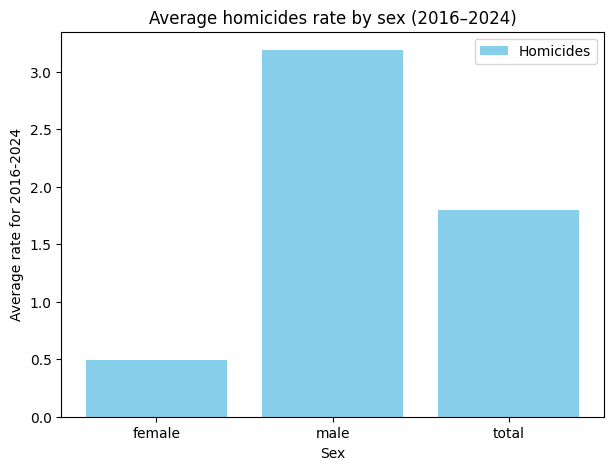

In [99]:
#Plot barplots for different crime on the sex variable to see the criminality rate by sex,
# and then analyze for exemple which crimes women are the most likely to commit

plt.figure(figsize=(7,5))
plt.bar(df_hom_rates_by_sex_renamed["Sex"], df_hom_rates_by_sex_renamed["Rate per 100k"], color='skyblue', label='Homicides')
plt.title("Average homicides rate by sex (2016–2024)")
plt.xlabel("Sex")
plt.ylabel("Average rate for 2016-2024")
plt.legend()
plt.show()

###Non-violent theft rate by sex

In [100]:
#Computation of the totals by sex (Sexe) from the two different DataFrames, on the variable Non-violent theft and on the variable population

nvt_totals = (
    pivoted_df_copy
    .groupby('Sexe')['Vols sans violence contre des personnes']
    .sum()
    .reset_index()
)

pop_totals = (
    df_pop_années_long
    .groupby('Sexe')['Population']
    .sum()
    .reset_index()
)

In [101]:
#Compute the rate by 100 000 individuals:

df_nvt_rates_by_sex = pd.merge(nvt_totals, pop_totals, on='Sexe')

df_nvt_rates_by_sex['Rate per 100k'] = (
    df_nvt_rates_by_sex['Vols sans violence contre des personnes'] / (df_nvt_rates_by_sex['Population']*1000) * 100_000
)
df_nvt_rates_by_sex_renamed = df_nvt_rates_by_sex.rename(columns={
    "Vols sans violence contre des personnes": "Non-violent theft",
    "Sexe": "Sex"
    })
df_nvt_rates_by_sex_renamed

,Sex,Non-violent theft,Population,Rate per 100k
0,female,132778,313428.108,42.363144
1,male,495609,294081.006,168.528055
2,total,628387,607509.114,103.436637


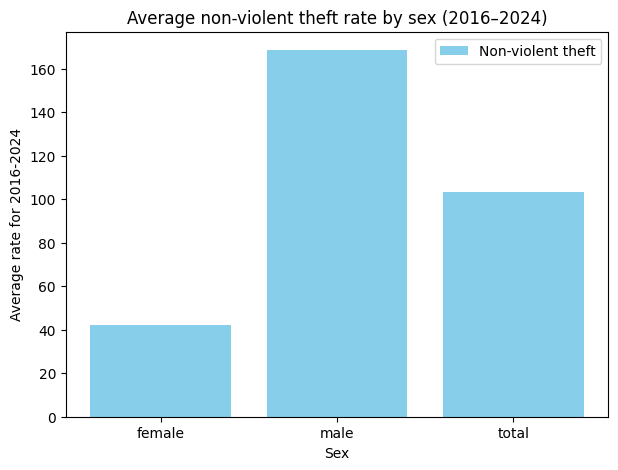

In [102]:
#Plot barplots for different crime on the sex variable to see the criminality rate by sex,
# and then analyze for exemple which crimes women are the most likely to commit

plt.figure(figsize=(7,5))
plt.bar(df_nvt_rates_by_sex_renamed["Sex"], df_nvt_rates_by_sex_renamed["Rate per 100k"], color='skyblue', label='Non-violent theft')
plt.title("Average non-violent theft rate by sex (2016–2024)")
plt.xlabel("Sex")
plt.ylabel("Average rate for 2016-2024")
plt.legend()
plt.show()

###Physical domestic violence

In [103]:
#Computation of the totals by sex (Sexe) from the two different DataFrames, on the variable physical domestic violence and on the variable population

pdv_totals = (
    pivoted_df_copy
    .groupby('Sexe')['Violences physiques dans le cadre intra-familial']
    .sum()
    .reset_index()
)

pop_totals = (
    df_pop_années_long
    .groupby('Sexe')['Population']
    .sum()
    .reset_index()
)

In [104]:
#Compute the rate by 100 000 individuals:

df_pdv_rates_by_sex = pd.merge(pdv_totals, pop_totals, on='Sexe')

df_pdv_rates_by_sex['Rate per 100k'] = (
    df_pdv_rates_by_sex['Violences physiques dans le cadre intra-familial'] / (df_pdv_rates_by_sex['Population']*1000) * 100_000
)
df_pdv_rates_by_sex_renamed = df_pdv_rates_by_sex.rename(columns={
    "Violences physiques dans le cadre intra-familial": "Physical domestic violence",
    "Sexe": "Sex"
    })
df_pdv_rates_by_sex_renamed

,Sex,Physical domestic violence,Population,Rate per 100k
0,female,229060,313428.108,73.082150
1,male,1069711,294081.006,363.747055
2,total,1298771,607509.114,213.786258


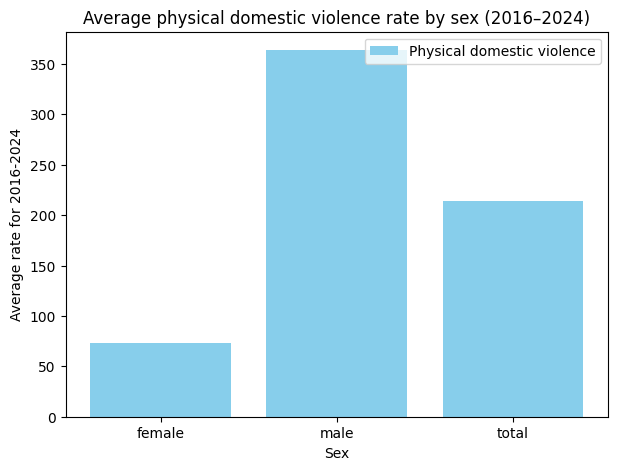

In [105]:
#Plot barplots for different crime on the sex variable to see the criminality rate by sex,
# and then analyze for exemple which crimes women are the most likely to commit

plt.figure(figsize=(7,5))
plt.bar(df_pdv_rates_by_sex_renamed["Sex"], df_pdv_rates_by_sex_renamed["Rate per 100k"], color='skyblue', label='Physical domestic violence')
plt.title("Average physical domestic violence rate by sex (2016–2024)")
plt.xlabel("Sex")
plt.ylabel("Average rate for 2016-2024")
plt.legend()
plt.show()

###Drug dealing incidents

In [106]:
#Computation of the totals by sex (Sexe) from the two different DataFrames, on the variable drug dealing incident and on the variable population

ddi_totals = (
    pivoted_df_copy
    .groupby('Sexe')['Trafic de stupéfiants']
    .sum()
    .reset_index()
)

pop_totals = (
    df_pop_années_long
    .groupby('Sexe')['Population']
    .sum()
    .reset_index()
)

In [107]:
#Compute the rate by 100 000 individuals:

df_ddi_rates_by_sex = pd.merge(ddi_totals, pop_totals, on='Sexe')

df_ddi_rates_by_sex['Rate per 100k'] = (
    df_ddi_rates_by_sex['Trafic de stupéfiants'] / (df_ddi_rates_by_sex['Population']*1000) * 100_000
)
df_ddi_rates_by_sex_renamed = df_ddi_rates_by_sex.rename(columns={
    "Trafic de stupéfiants": "Drug dealing incidents",
    "Sexe": "Sex"
    })
df_ddi_rates_by_sex_renamed

,Sex,Drug dealing incidents,Population,Rate per 100k
0,female,36928,313428.108,11.781968
1,male,378338,294081.006,128.650947
2,total,415266,607509.114,68.355518


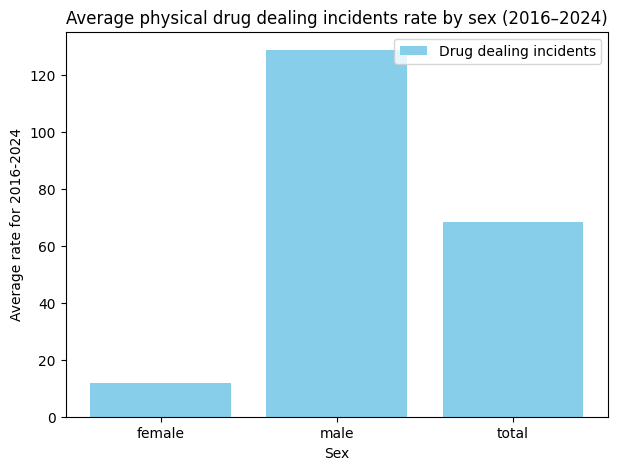

In [108]:
#Plot barplots for different crime on the sex variable to see the criminality rate by sex,
# and then analyze for exemple which crimes women are the most likely to commit

plt.figure(figsize=(7,5))
plt.bar(df_ddi_rates_by_sex_renamed["Sex"], df_ddi_rates_by_sex_renamed["Rate per 100k"], color='skyblue', label='Drug dealing incidents')
plt.title("Average physical drug dealing incidents rate by sex (2016–2024)")
plt.xlabel("Sex")
plt.ylabel("Average rate for 2016-2024")
plt.legend()
plt.show()

###Drug use incidents

In [109]:
#Computation of the totals by sex (Sexe) from the two different DataFrames, on the variable drug dealing incident and on the variable population

dui_totals = (
    pivoted_df_copy
    .groupby('Sexe')['Usage de stupéfiants']
    .sum()
    .reset_index()
)

pop_totals = (
    df_pop_années_long
    .groupby('Sexe')['Population']
    .sum()
    .reset_index()
)

In [110]:
#Compute the rate by 100 000 individuals:

df_dui_rates_by_sex = pd.merge(dui_totals, pop_totals, on='Sexe')

df_dui_rates_by_sex['Rate per 100k'] = (
    df_dui_rates_by_sex['Usage de stupéfiants'] / (df_dui_rates_by_sex['Population']*1000) * 100_000
)
df_dui_rates_by_sex_renamed = df_dui_rates_by_sex.rename(columns={
    "Usage de stupéfiants": "Drug usage incidents",
    "Sexe": "Sex"
    })
df_dui_rates_by_sex_renamed

,Sex,Drug usage incidents,Population,Rate per 100k
0,female,162663,313428.108,51.898026
1,male,1760224,294081.006,598.550727
2,total,1922887,607509.114,316.519860


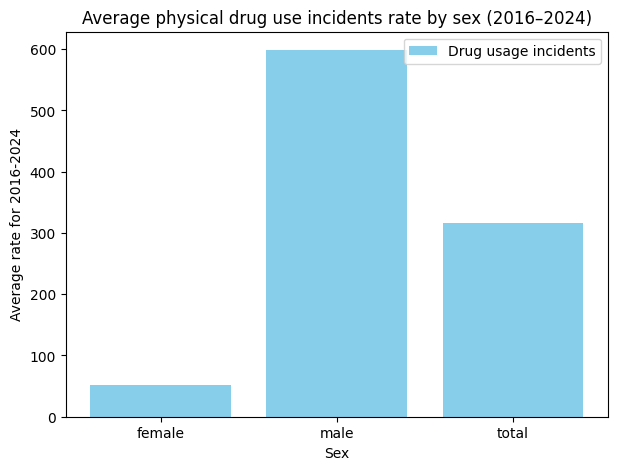

In [111]:
#Plot barplots for different crime on the sex variable to see the criminality rate by sex,
# and then analyze for exemple which crimes women are the most likely to commit

plt.figure(figsize=(7,5))
plt.bar(df_dui_rates_by_sex_renamed["Sex"], df_dui_rates_by_sex_renamed["Rate per 100k"], color='skyblue', label='Drug usage incidents')
plt.title("Average physical drug use incidents rate by sex (2016–2024)")
plt.xlabel("Sex")
plt.ylabel("Average rate for 2016-2024")
plt.legend()
plt.show()

##2.2 Nationality

###2.2.1 Preliminatory work on nationality data

In [112]:
#Show the Excel File on the sheet nationality, in order to look at the "total" line for every year and see the trend
path = "Intro-to-data-analysis-with-Python---Final-Project/Data/mec.xlsx"

#Read Excel on the sheet 2.nationalité, skipping the first 2 rows and setting multiple headers (years and categories)
df_nationality = pd.read_excel(path, sheet_name="2.nationalité", skiprows=2, header=[0, 1])

#Remove the 1st empty column of the sheet
df_nationality = df_nationality.iloc[:,1:]

#Pivot the year header
pivoted_nationality_df = (
    df_nationality
    .set_index("Nationalité")
    .stack(level=1, future_stack=True)          # move second header to rows & future_stack=True just allow us to avoid a warning
    .reset_index()           # make it a column
    .rename(columns={"level_1": "Année"})
  )

#Cast the type of Nationalité column from tupple to string
pivoted_nationality_df["Nationalité"] = pivoted_nationality_df["Nationalité"].str[0]

pivoted_nationality_df.head(15)

,Nationalité,Année,Homicides (y compris coups et blessures volontaires suivis de mort),Tentatives d'homicide,Violences physiques dans le cadre intra-familial,Violences physiques hors cadre intra-familial,Violences sexuelles,Viols et tentatives de viols,Vols avec arme,Vols violents sans arme,Vols sans violence contre des personnes,Cambriolages de logement,Vols de véhicule,Vols dans les véhicule,Vols d'accessoires sur les véhicules,Destructions et dégradations volontaires,Escroqueries et fraudes aux moyens de paiements,Trafic de stupéfiants,Usage de stupéfiants
0,France,2016,837.0,1521.0,80605.0,111154.0,33198.0,9165.0,4840.0,15006.0,56959.0,31631.0,24097.0,20775.0,6319.0,70553.0,54998.0,35718.0,166710.0
1,France,2017,958.0,1739.0,82705.0,113866.0,35564.0,10020.0,4903.0,13100.0,57674.0,31114.0,21623.0,21300.0,6705.0,76188.0,55306.0,38124.0,171291.0
2,France,2018,992.0,1867.0,89319.0,121730.0,40837.0,11732.0,4564.0,12489.0,57478.0,29330.0,23593.0,21134.0,7577.0,77280.0,53152.0,38565.0,167786.0
3,France,2019,917.0,1926.0,100898.0,117929.0,44042.0,12966.0,4386.0,12453.0,54554.0,27647.0,20758.0,18575.0,7172.0,77285.0,52689.0,39681.0,158287.0
4,France,2020,875.0,2053.0,115523.0,107812.0,45623.0,14384.0,3983.0,10429.0,46516.0,22464.0,18569.0,16024.0,5728.0,69519.0,45892.0,34995.0,143491.0
5,France,2021,958.0,2237.0,136341.0,113868.0,56989.0,19374.0,3858.0,10532.0,45517.0,19381.0,18713.0,15036.0,4442.0,66177.0,47881.0,38949.0,196022.0
6,France,2022,1117.0,2428.0,149106.0,110269.0,60985.0,21723.0,3909.0,9393.0,43493.0,18245.0,17566.0,14742.0,5728.0,62675.0,43262.0,39531.0,219482.0
7,France,2023,1179.0,2835.0,162261.0,115865.0,66672.0,24334.0,4042.0,9553.0,45647.0,20429.0,20950.0,12845.0,6055.0,66005.0,42404.0,38809.0,233135.0
8,France,2024,1189.0,2726.0,165667.0,115465.0,70609.0,25051.0,3971.0,9030.0,44733.0,20057.0,21331.0,14679.0,5981.0,61988.0,41289.0,41001.0,254170.0
9,Afrique,2016,77.0,184.0,10426.0,9065.0,2657.0,949.0,516.0,2607.0,8868.0,2851.0,918.0,2866.0,269.0,4021.0,5071.0,2857.0,9498.0


In [113]:
#Analyze the evolution of criminality with taking into account change in population. A new excel has to be downloaded, showing the structure of population by nationality:
path = "Intro-to-data-analysis-with-Python---Final-Project/Data/pop_e.xlsx"

xls_pop_e = pd.ExcelFile(path)
xls_pop_e.sheet_names

['Sommaire',
 'Figure 1',
 'Figure 2',
 'Figure 3',
 'Figure 4',
 'Figure 5',
 'Figure 6',
 'Question 1',
 'Question 2',
 'Question 3',
 'Question 4',
 'Question 5',
 'Question 6']

In [114]:
#Show the Excel File on the sheet Figure 5 – Population étrangère et immigrée en France, in order to look at the "Etrangers, effectif (en milliers)" column for every year between 2016 to 2024
df_pop_e = pd.read_excel(path, sheet_name="Figure 5", skiprows=2, header=[0])
df_pop_e = df_pop_e[0:-5] #Remove the last 5 rows which contained strings
df_pop_e = df_pop_e.iloc[1:].reset_index(drop=True)
df_pop_e = df_pop_e.drop(df_pop_e.columns[[2, 3, 4, 5, 6, 7]], axis=1)

df_pop_e.head(10)

,Année,Étrangers
0,2024 (p),6028
1,2023 (p),5622
2,2022,5331
3,2021,5235.9
4,2020,5149.2
5,2019,5000
6,2018,4849.9
7,2017,4703.8
8,2016,4541.5
9,2015,4427.9


In [115]:
df_pop_e_années = df_pop_e.loc[0:8]
display(df_pop_e_années)


,Année,Étrangers
0,2024 (p),6028
1,2023 (p),5622
2,2022,5331
3,2021,5235.9
4,2020,5149.2
5,2019,5000
6,2018,4849.9
7,2017,4703.8
8,2016,4541.5


In [116]:
# Convert 'Année' to string, then remove "(p)" if present, then convert to int
# Clean both DataFrames
for df in [df_pop_années_ensemble, df_pop_e_années]:
    df['Année'] = df['Année'].astype(str).str.replace(r" \([pP]\)", "", regex=True).astype(int)

/tmp/ipython-input-1104563096.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Année'] = df['Année'].astype(str).str.replace(r" \([pP]\)", "", regex=True).astype(int)


In [117]:
df_pop_ensemble_e_merged = pd.merge(
    df_pop_années_ensemble,
    df_pop_e_années,
    on="Année",
    how="left"  # keeps all years from left DF
)
df_pop_ensemble_e_merged.head(10)

,Année,Ensemble,Étrangers
0,2024,68436.616,6028
1,2023,68246.082,5622
2,2022,68060.207,5331
3,2021,67697.091,5235.9
4,2020,67441.850,5149.2
5,2019,67257.982,5000
6,2018,66992.159,4849.9
7,2017,66774.482,4703.8
8,2016,66602.645,4541.5


In [118]:
#Calculating the number of the population that is not foreign
df_pop_ensemble_e_merged['Français'] = (
    df_pop_ensemble_e_merged['Ensemble'] - df_pop_ensemble_e_merged['Étrangers']
)
df_pop_ensemble_e_merged.head()

,Année,Ensemble,Étrangers,Français
0,2024,68436.616,6028,62408.616
1,2023,68246.082,5622,62624.082
2,2022,68060.207,5331,62729.207
3,2021,67697.091,5235.9,62461.191
4,2020,67441.850,5149.2,62292.65


In [119]:
#Reshaping the population data in long format (vs. wide format, where each category is in a separate column),
#so that each variable is in a single column, and there’s a column that indicates the category (Nationalité):
df_pop_ensemble_e_long = df_pop_ensemble_e_merged.melt(
    id_vars='Année',
    value_vars=['Étrangers', 'Français', 'Ensemble'],
    var_name='Nationalité',
    value_name='Population'
)
df_pop_ensemble_e_long.head(30)

,Année,Nationalité,Population
0,2024,Étrangers,6028
1,2023,Étrangers,5622
2,2022,Étrangers,5331
3,2021,Étrangers,5235.9
4,2020,Étrangers,5149.2
5,2019,Étrangers,5000
6,2018,Étrangers,4849.9
7,2017,Étrangers,4703.8
8,2016,Étrangers,4541.5
9,2024,Français,62408.616


In [120]:
nationality_mapping = {
    'France': 'French',
    'Français': 'French',
    'Afrique': 'Foreigners',
    'Amérique , Océanie': 'Foreigners',
    'Asie': 'Foreigners',
    'Europe hors UE': 'Foreigners',
    'UE hors France': 'Foreigners',
    'Étrangers': 'Foreigners',
    'Ensemble': 'Total',
    'Total': 'Total'
    }

In [121]:
df_pop_ensemble_e_long['Nationalité'] = df_pop_ensemble_e_long['Nationalité'].map(nationality_mapping)

pivoted_nationality_df['Nationalité'] = pivoted_nationality_df['Nationalité'].map(nationality_mapping)

In [122]:
#Computation of the totals (for the whole period 2016-2024) by nationality (Nationalité) from the two different DataFrames, on the variable violences sexuelles and on the variable population

nat_sv_totals = (
    pivoted_nationality_df
    .groupby('Nationalité')['Violences sexuelles']
    .sum()
    .reset_index()
)

nat_pop_totals = (
    df_pop_ensemble_e_long
    .groupby('Nationalité')['Population']
    .sum()
    .reset_index()
)

In [123]:
#Compute the rate by nationality for 100 000 individuals:

df_sv_rates_by_nationality = pd.merge(nat_sv_totals, nat_pop_totals, on='Nationalité')

df_sv_rates_by_nationality['Rate per 100k'] = (
    df_sv_rates_by_nationality['Violences sexuelles'] / (df_sv_rates_by_nationality['Population']*1000) * 100_000
)
df_sv_rates_by_nationality_renamed = df_sv_rates_by_nationality.rename(columns={
    "Violences sexuelles": "Sexual violences",
    "Nationalité": "Nationality"
    })
df_sv_rates_by_nationality_renamed

,Nationality,Sexual violences,Population,Rate per 100k
0,Foreigners,69244.0,46461.3,149.035864
1,French,454519.0,561047.814,81.012525
2,Total,523763.0,607509.114,86.214838


###2.2.2 Visualisation

####Sexual violences

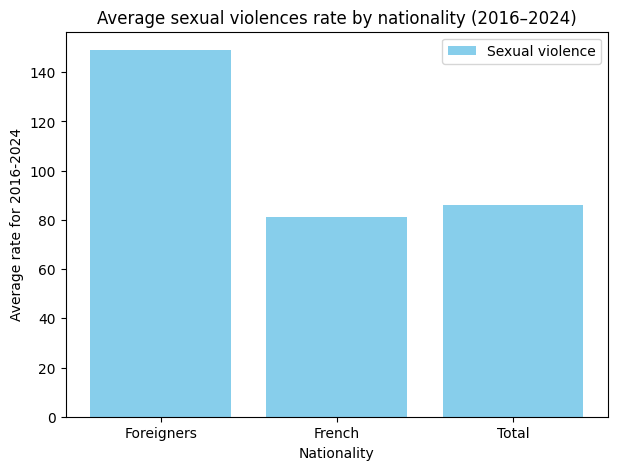

In [124]:
#Plot barplots for different crime on the nationality variable to see the criminality rate by nationality,
# and then analyze for exemple which crimes there is a surrepresentation of foreigners/French

plt.figure(figsize=(7,5))
plt.bar(df_sv_rates_by_nationality_renamed["Nationality"], df_sv_rates_by_nationality_renamed["Rate per 100k"], color='skyblue', label='Sexual violence')
plt.title("Average sexual violences rate by nationality (2016–2024)")
plt.xlabel("Nationality")
plt.ylabel("Average rate for 2016-2024")
plt.legend()
plt.show()

##2.3 Age

###2.3.1 Preliminatory work on age data

In [125]:
#Read Excel File - total accused people and display the sheets' names

path = "Intro-to-data-analysis-with-Python---Final-Project/Data/mec.xlsx"

xls = pd.ExcelFile(path)
xls.sheet_names

['Lisez moi',
 '1.sexe - age',
 '2.nationalité',
 '3.sexe',
 '4.nationalité majmin',
 '5.PM - PP']

In [126]:
#Show the Excel File on the sheet age, in order to look at the "total" line for each category of offense by age range and see the trend

#Read Excel on the sheet 1.sexe - age, skipping the first 2 rows and setting multiple headers (sex, year and categories)
df_age = pd.read_excel(path, sheet_name="1.sexe - age", skiprows=2, header=[0, 1])

print(df_age.columns[:5])

#Remove the 1st empty column of the sheet
df_age = df_age.iloc[:,1:]

#Flatten MultiIndex : merge both level with "_", ignore empty
df_age.columns = ['_'.join([str(i) for i in col if i]).strip() for col in df_age.columns]

print(df_age.columns[:5])

#Fill columns properly and rename them

df_age["Sexe_Unnamed: 1_level_1"] = df_age["Sexe_Unnamed: 1_level_1"].ffill()
df_age["Age_Unnamed: 2_level_1"] = df_age["Age_Unnamed: 2_level_1"].ffill()

df_age = df_age.rename(columns={
    "Sexe_Unnamed: 1_level_1": "Sexe",
    "Age_Unnamed: 2_level_1": "Age"
})

#Vérify the result
print(df_age.columns[:5])

MultiIndex([(                                                 'Unnamed: 0_level_0', ...),
            (                                                               'Sexe', ...),
            (                                                                'Age', ...),
            ('Homicides (y compris coups et blessures volontaires suivis de mort)', ...),
            ('Homicides (y compris coups et blessures volontaires suivis de mort)', ...)],
           )
Index(['Sexe_Unnamed: 1_level_1', 'Age_Unnamed: 2_level_1',
       'Homicides (y compris coups et blessures volontaires suivis de mort)_2016',
       'Homicides (y compris coups et blessures volontaires suivis de mort)_2017',
       'Homicides (y compris coups et blessures volontaires suivis de mort)_2018'],
      dtype='object')
Index(['Sexe', 'Age',
       'Homicides (y compris coups et blessures volontaires suivis de mort)_2016',
       'Homicides (y compris coups et blessures volontaires suivis de mort)_2017',
       'Homicide

In [127]:
#Define identification columns

id_vars_age = ["Sexe", "Age"]
value_vars_age = [col for col in df_age.columns if col not in id_vars_age]

#Transform table into long version
df_long_age = df_age.melt(
    id_vars=id_vars_age,
    value_vars=value_vars_age,
    var_name="Infraction_Année",
    value_name="Nombre"
)

#Separate infraction and year
df_long_age[["Infraction", "Année"]] = df_long_age["Infraction_Année"].str.rsplit("_", n=1, expand=True)
df_long_age["Année"] = df_long_age["Année"].astype(int)
df_long_age = df_long_age.drop(columns="Infraction_Année")

#Verification
df_long_age.head()

,Sexe,Age,Nombre,Infraction,Année
0,Femmes,Moins de 13 ans,0.0,Homicides (y compris coups et blessures volont...,2016
1,Femmes,13 à 17 ans,9.0,Homicides (y compris coups et blessures volont...,2016
2,Femmes,18 à 29 ans,42.0,Homicides (y compris coups et blessures volont...,2016
3,Femmes,30 à 44 ans,55.0,Homicides (y compris coups et blessures volont...,2016
4,Femmes,45 à 59 ans,17.0,Homicides (y compris coups et blessures volont...,2016


In [128]:
#Filter for adults between 18-59

adultes = ["18 à 29 ans", "30 à 44 ans", "45 à 59 ans"]
df_adultes = df_long_age[df_long_age["Age"].isin(adultes)]

#Verification
df_adultes.head()

,Sexe,Age,Nombre,Infraction,Année
2,Femmes,18 à 29 ans,42.0,Homicides (y compris coups et blessures volont...,2016
3,Femmes,30 à 44 ans,55.0,Homicides (y compris coups et blessures volont...,2016
4,Femmes,45 à 59 ans,17.0,Homicides (y compris coups et blessures volont...,2016
8,Hommes,18 à 29 ans,386.0,Homicides (y compris coups et blessures volont...,2016
9,Hommes,30 à 44 ans,236.0,Homicides (y compris coups et blessures volont...,2016


In [129]:
#Visualize just the total lines
df_total = df_adultes[df_adultes["Sexe"] == "Total"]
display(df_total)

,Sexe,Age,Nombre,Infraction,Année
14,Total,18 à 29 ans,428.0,Homicides (y compris coups et blessures volont...,2016
15,Total,30 à 44 ans,291.0,Homicides (y compris coups et blessures volont...,2016
16,Total,45 à 59 ans,150.0,Homicides (y compris coups et blessures volont...,2016
33,Total,18 à 29 ans,470,Homicides (y compris coups et blessures volont...,2017
34,Total,30 à 44 ans,319,Homicides (y compris coups et blessures volont...,2017
...,...,...,...,...,...
2884,Total,30 à 44 ans,61809.0,Usage de stupéfiants,2023
2885,Total,45 à 59 ans,14707.0,Usage de stupéfiants,2023
2902,Total,18 à 29 ans,185560.0,Usage de stupéfiants,2024
2903,Total,30 à 44 ans,71684.0,Usage de stupéfiants,2024


from matplotlib import pyplot as plt
df_total['Année'].plot(kind='hist', bins=20, title='Année')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df_total.groupby('Age').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_total['Année'].plot(kind='line', figsize=(8, 4), title='Année')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_total['Age'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_total, x='Année', y='Age', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

###2.3.2 Visualisation

<Figure size 1200x600 with 0 Axes>

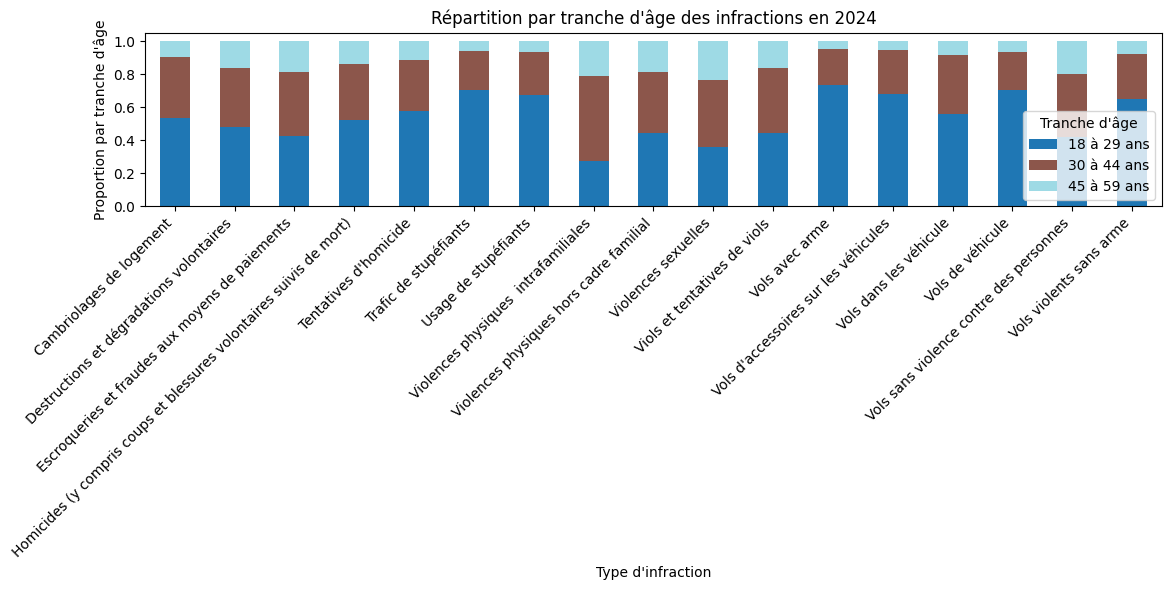

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrer pour l'année 2024
df_2024 = df_total[df_total["Année"] == 2024]

# Calculer la proportion de chaque tranche d'âge par type d'infraction
df_2024_prop = df_2024.copy()
df_2024_prop["Total_Infraction"] = df_2024_prop.groupby("Infraction")["Nombre"].transform("sum")
df_2024_prop["Proportion"] = df_2024_prop["Nombre"] / df_2024_prop["Total_Infraction"]

# Créer le graphique en barres empilées
plt.figure(figsize=(12,6))
# On pivot pour avoir les âges en colonnes
df_pivot = df_2024_prop.pivot(index="Infraction", columns="Age", values="Proportion")
df_pivot.plot(kind="bar", stacked=True, colormap="tab20", figsize=(12,6))

plt.ylabel("Proportion par tranche d'âge")
plt.xlabel("Type d'infraction")
plt.title("Répartition par tranche d'âge des infractions en 2024")
plt.legend(title="Tranche d'âge")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

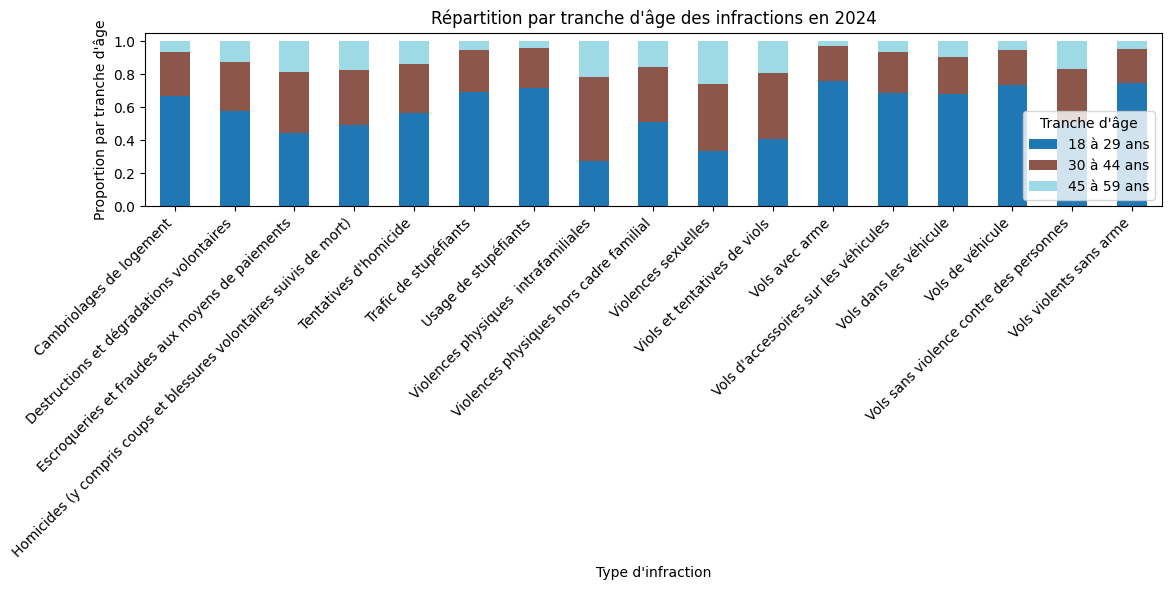

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrer pour l'année 2016
df_2016 = df_total[df_total["Année"] == 2016]

# Calculer la proportion de chaque tranche d'âge par type d'infraction
df_2016_prop = df_2016.copy()
df_2016_prop["Total_Infraction"] = df_2016_prop.groupby("Infraction")["Nombre"].transform("sum")
df_2016_prop["Proportion"] = df_2016_prop["Nombre"] / df_2016_prop["Total_Infraction"]

# Créer le graphique en barres empilées
plt.figure(figsize=(12,6))
# On pivot pour avoir les âges en colonnes
df_pivot = df_2016_prop.pivot(index="Infraction", columns="Age", values="Proportion")
df_pivot.plot(kind="bar", stacked=True, colormap="tab20", figsize=(12,6))

plt.ylabel("Proportion par tranche d'âge")
plt.xlabel("Type d'infraction")
plt.title("Répartition par tranche d'âge des infractions en 2024")
plt.legend(title="Tranche d'âge")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Part 3: For which groups is it possible to see an increase in committing crimes

##3.1 Nationality

In [130]:
#Diagnosing the column: shows what values are actually in the Nationalité column
pivoted_nationality_df['Nationalité'].value_counts(dropna=False)

,count
Nationalité,
Foreigners,45
French,9
Total,9
NaN,9


In [131]:
total_table_by_nationality = (
    pivoted_nationality_df
    .assign(
        Total_crimes=lambda d: d[d.columns.difference(['Année', 'Nationalité'])].sum(axis=1)
    )
    .groupby(['Nationalité', 'Année'])['Total_crimes']
    .sum()
    .reset_index()
)
total_table_by_nationality

,Nationalité,Année,Total_crimes
0,Foreigners,2016,117046.0
1,Foreigners,2017,128209.0
2,Foreigners,2018,141194.0
3,Foreigners,2019,144998.0
4,Foreigners,2020,141133.0
5,Foreigners,2021,163030.0
6,Foreigners,2022,179156.0
7,Foreigners,2023,178842.0
8,Foreigners,2024,182689.0
9,French,2016,724086.0


In [132]:
#Compute the crime rate by nationality for 100 000 individuals by year:

df_crime_rates_by_nationality_by_year = pd.merge(total_table_by_nationality, df_pop_ensemble_e_long, on=['Nationalité', 'Année'])

df_crime_rates_by_nationality_by_year['Rate per 100k'] = (
    df_crime_rates_by_nationality_by_year['Total_crimes'] / (df_crime_rates_by_nationality_by_year['Population']*1000) * 100_000
)
df_crime_rates_by_nationality_by_year_renamed = df_crime_rates_by_nationality_by_year.rename(columns={
    "Nationalité": "Nationality",
    "Année": "Year"
    })
df_crime_rates_by_nationality_by_year_renamed

,Nationality,Year,Total_crimes,Population,Rate per 100k
0,Foreigners,2016,117046.0,4541.5,2577.254211
1,Foreigners,2017,128209.0,4703.8,2725.647349
2,Foreigners,2018,141194.0,4849.9,2911.276521
3,Foreigners,2019,144998.0,5000,2899.96
4,Foreigners,2020,141133.0,5149.2,2740.872369
5,Foreigners,2021,163030.0,5235.9,3113.695831
6,Foreigners,2022,179156.0,5331,3360.645282
7,Foreigners,2023,178842.0,5622,3181.109925
8,Foreigners,2024,182689.0,6028,3030.673524
9,French,2016,724086.0,62061.145,1166.730005


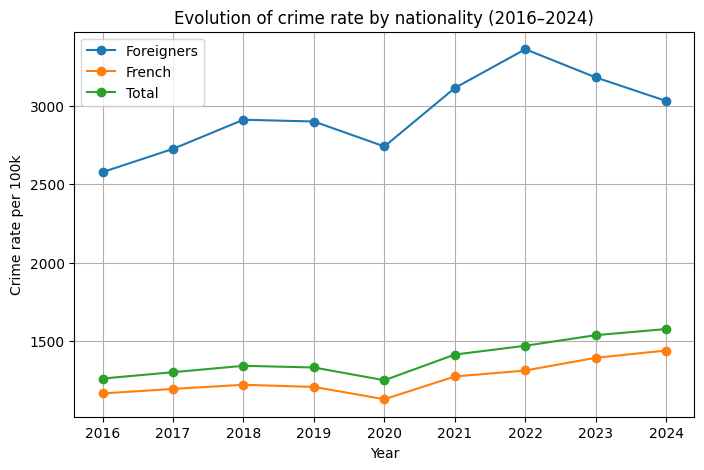

In [133]:
plt.figure(figsize=(8, 5))

for nationality in df_crime_rates_by_nationality_by_year_renamed['Nationality'].unique():
    df_subset = df_crime_rates_by_nationality_by_year_renamed[
        df_crime_rates_by_nationality_by_year_renamed['Nationality'] == nationality
    ]

    plt.plot(
        df_subset['Year'],
        df_subset['Rate per 100k'],
        marker='o',
        label=nationality
    )

plt.title("Evolution of crime rate by nationality (2016–2024)")
plt.xlabel("Year")
plt.ylabel("Crime rate per 100k")
plt.legend()
plt.grid(True)
plt.show()

##3.2 Sex

In [134]:
pivoted_df_copy_2 = pivoted_df.copy()

In [135]:
sex_mapping = {
    'Femmes': 'female',
    'Femme': 'female',
    'female': 'female',
    'Hommes': 'male',
    'Homme': 'male',
    'male': 'male',
    'Ensemble': 'total',
    'Total': 'total',
    'total': 'total'
    }


df_pop_années_long['Sexe'] = df_pop_années_long['Sexe'].map(sex_mapping)

pivoted_df_copy_2['Sexe'] = pivoted_df_copy_2['Sexe'].map(sex_mapping)

In [136]:
total_table_by_sex = (
    pivoted_df_copy_2
    .assign(
        Total_crimes=lambda d: d[d.columns.difference(['Année', 'Sexe'])].sum(axis=1)
    )
    .groupby(['Sexe', 'Année'])['Total_crimes']
    .sum()
    .reset_index()
)
total_table_by_sex

,Sexe,Année,Total_crimes
0,female,2016,111008
1,female,2017,113814
2,female,2018,116038
3,female,2019,115842
4,female,2020,107233
5,female,2021,119578
6,female,2022,120827
7,female,2023,133331
8,female,2024,136836
9,male,2016,729335


In [137]:
#Compute the crime rate by sex for 100 000 individuals by year:

df_crime_rates_by_sex_by_year = pd.merge(total_table_by_sex, df_pop_années_long, on=['Sexe', 'Année'])

df_crime_rates_by_sex_by_year['Rate per 100k'] = (
    df_crime_rates_by_sex_by_year['Total_crimes'] / (df_crime_rates_by_sex_by_year['Population']*1000) * 100_000
)
df_crime_rates_by_sex_by_year_renamed = df_crime_rates_by_sex_by_year.rename(columns={
    "Sexe": "Sex",
    "Année": "Year"
    })
df_crime_rates_by_sex_by_year_renamed

display(df_crime_rates_by_sex_by_year_renamed)

,Sex,Year,Total_crimes,Population,Rate per 100k
0,female,2016,111008,34372.558,322.955306
1,female,2017,113814,34477.222,330.113604
2,female,2018,116038,34594.401,335.424221
3,female,2019,115842,34722.069,333.626432
4,female,2020,107233,34812.046,308.034179
5,female,2021,119578,34930.005,342.336052
6,female,2022,120827,35092.520,344.309842
7,female,2023,133331,35172.311,379.079441
8,female,2024,136836,35254.976,388.132444
9,male,2016,729335,32230.087,2262.901121


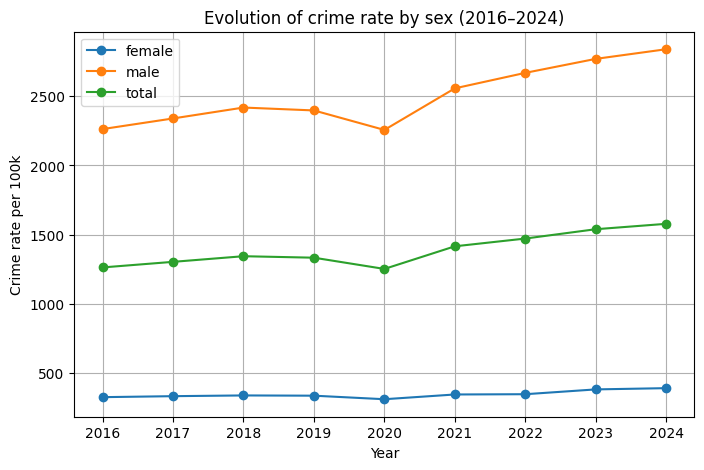

In [138]:
plt.figure(figsize=(8, 5))

for sex in df_crime_rates_by_sex_by_year_renamed['Sex'].unique():
    df_subset_sex = df_crime_rates_by_sex_by_year_renamed[
        df_crime_rates_by_sex_by_year_renamed['Sex'] == sex
    ]

    plt.plot(
        df_subset_sex['Year'],
        df_subset_sex['Rate per 100k'],
        marker='o',
        label=sex
    )

plt.title("Evolution of crime rate by sex (2016–2024)")
plt.xlabel("Year")
plt.ylabel("Crime rate per 100k")
plt.legend()
plt.grid(True)
plt.show()